Accuracy: 0.5516
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.91      0.78      1343
           1       0.81      0.95      0.88      1600
           2       0.85      0.30      0.44      1380
           3       0.74      0.32      0.45      1433
           4       0.83      0.13      0.23      1295
           5       0.61      0.04      0.08      1273
           6       0.64      0.94      0.76      1396
           7       0.91      0.28      0.42      1503
           8       0.29      0.60      0.39      1357
           9       0.37      0.94      0.53      1420

    accuracy                           0.55     14000
   macro avg       0.67      0.54      0.50     14000
weighted avg       0.68      0.55      0.51     14000



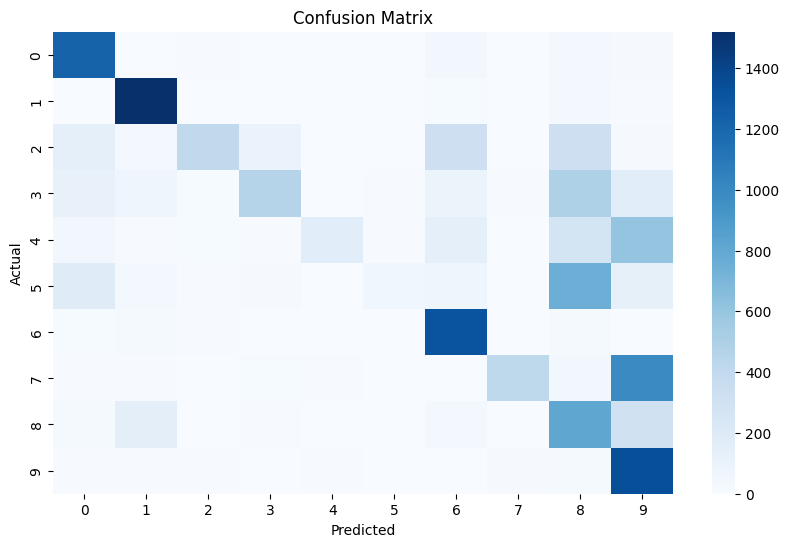

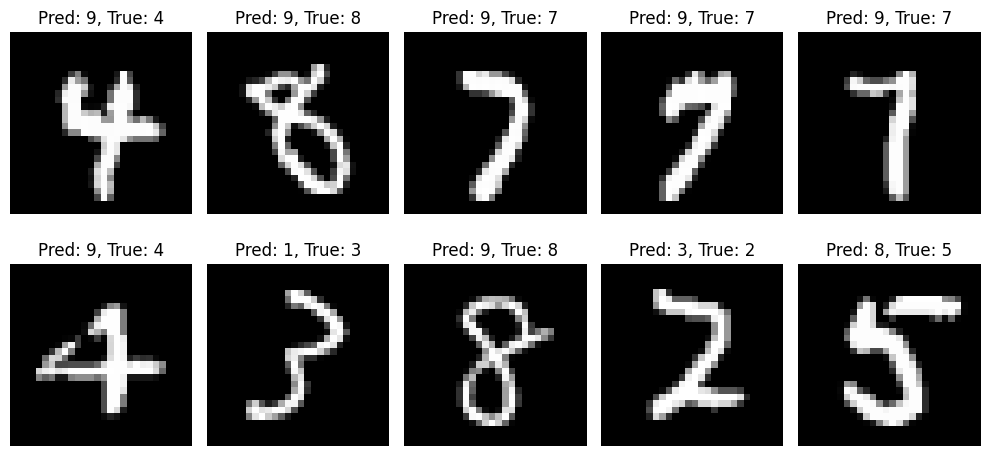

In [7]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ----------------------------------------
# Load the MNIST dataset (70,000 handwritten digit images)
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)  # Convert labels to integers

# Normalize the pixel values to [0, 1]
X /= 255.0

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------------------------
# Train a Gaussian Naive Bayes classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# ----------------------------------------
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# ----------------------------------------
# Confusion Matrix
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ----------------------------------------
# Visualize misclassified examples
misclassified_idxs = np.where(y_test != y_pred)[0]

plt.figure(figsize=(10, 5))
for i, idx in enumerate(misclassified_idxs[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test.iloc[idx].values.reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred[idx]}, True: {y_test.iloc[idx]}")
    plt.axis("off")
plt.tight_layout()
plt.show()